# Logistic Regression

Develop and evaluate a logistic model to predict the quality (such as high quality and low quality) of red wines according to the several features and calculating test scores. Write your model in Python.

Features that affect wine quality : 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol' .

Please split 80% data for training and 20% data for testing.

Calculate the accuracy of the prediction. 
The dataset can be found at Kaggle 
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [109]:
data_set=pd.read_csv("winequality-red (1).csv")

In [110]:
data_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [111]:
data_set.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

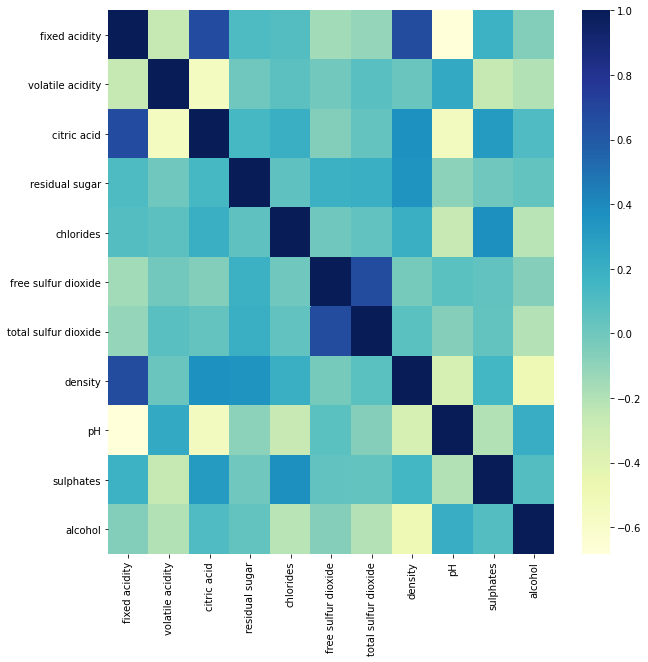

In [135]:
correlation=data_set.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cmap="YlGnBu")

In [112]:
data_set['quality']=data_set.quality.apply(lambda x: "High Quality" if x>= 7 else "Low Quality")

In [113]:
data_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low Quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Low Quality
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Low Quality
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Low Quality
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low Quality
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Low Quality
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,Low Quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,Low Quality
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Low Quality


In [114]:
#separte the predicting attribute into X and y for model training 
X=data_set.drop("quality",axis=1)
X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [115]:
y=data_set["quality"]
y

0       Low Quality
1       Low Quality
2       Low Quality
3       Low Quality
4       Low Quality
           ...     
1594    Low Quality
1595    Low Quality
1596    Low Quality
1597    Low Quality
1598    Low Quality
Name: quality, Length: 1599, dtype: object

In [116]:
# splitting the data as train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
print(X.shape,X_train.shape,X_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(1599, 11) (1279, 11) (320, 11)
(1599,) (1279,) (320,)


In [117]:
#Feature scaling
scale=StandardScaler()
X_train= scale.fit_transform(X_train)
X_test= scale.transform(X_test)
print(X_train.shape,X_test.shape)

(1279, 11) (320, 11)


In [118]:
#Traning the dataset with the logistic regression model
Logistic_model=LogisticRegression(random_state=10)


In [119]:
Logistic_model.fit(X_train,y_train)

LogisticRegression(random_state=10)

In [120]:
print(Logistic_model.predict(scale.transform([[12.6,0.31,0.72,5.2,0.072,6,29,0.9987,2.88,0.82,10.8]])))


['High Quality']


In [121]:
y_predict=Logistic_model.predict(X_test)

In [122]:
Accuracy=accuracy_score(y_test,y_predict)
print(Accuracy)

0.86875


In [123]:
Confusion_Matrix=confusion_matrix(y_test,y_pred)
print(Confusion_Matrix)

[[ 16  34]
 [  8 262]]


[[ 16  34]
 [  8 262]]


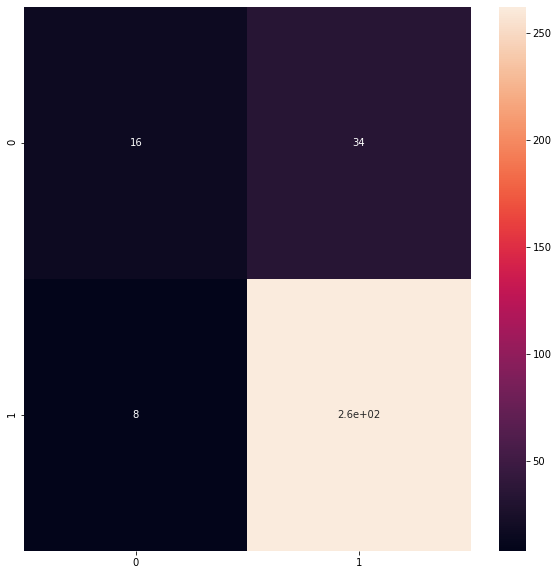

In [124]:
plt.figure(figsize=(10,10))
sns.heatmap(Confusion_Matrix,color='blue',annot=True)
print(Confusion_Matrix)